In [12]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

In [15]:
df = pd.read_csv('Desktop/CSU/MIS581/Churn_Modelling.csv')

In [16]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [17]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [18]:
df = df.drop(['CustomerId','RowNumber','Surname'], axis = "columns")
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [26]:
df1 = pd.get_dummies(df,columns = ['Geography','Gender'])
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


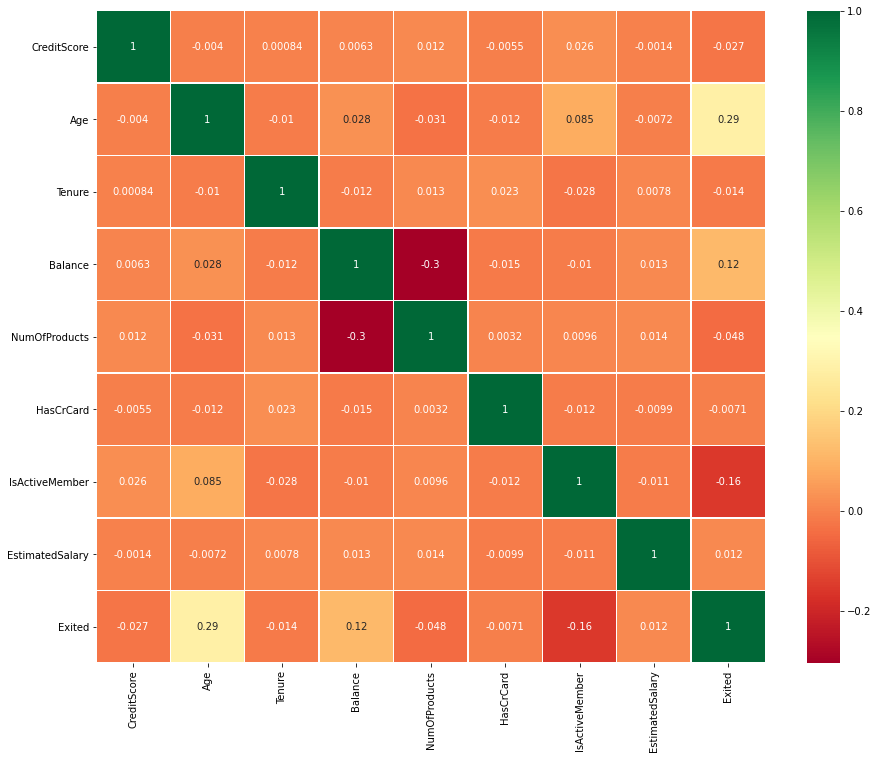

In [48]:
plt.figure(figsize=(15,12))  
sns.heatmap(df.corr(),annot=True,linewidths=.5, cmap="RdYlGn")
plt.show()

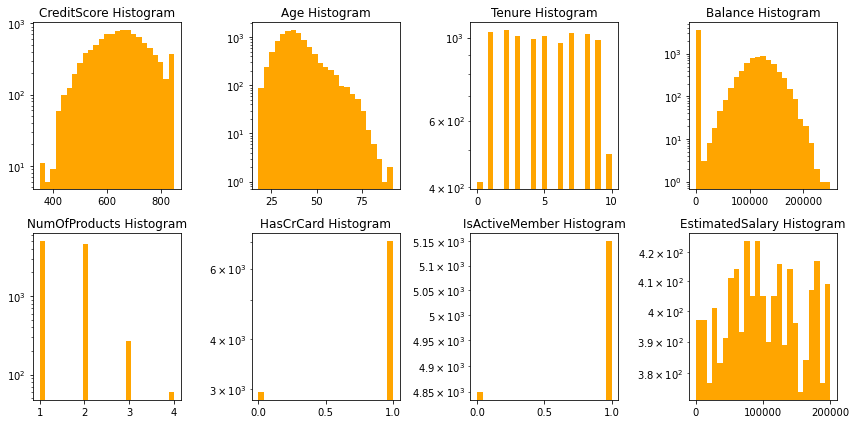

In [34]:
fig, axes = plt.subplots(2,4,figsize=(12,6))
feats = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
for i, ax in enumerate(axes.flatten()):
    ax.hist(df[feats[i]], bins=25, color='orange')
    ax.set_title(str(feats[i])+' Histogram', color='black')
    ax.set_yscale('log')
plt.tight_layout()

In [37]:
CreditScore_Exite_rate = df.groupby('CreditScore').Exited.mean()
CreditScore_Exite_rate

CreditScore
350    1.000000
351    1.000000
358    1.000000
359    1.000000
363    1.000000
         ...   
846    0.400000
847    0.333333
848    0.000000
849    0.250000
850    0.184549
Name: Exited, Length: 460, dtype: float64

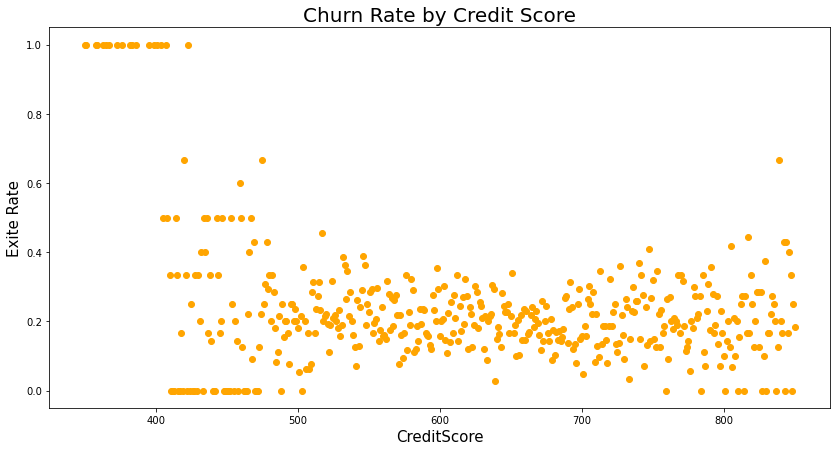

In [43]:
plt.figure(figsize = (14,7))
plt.scatter(x=CreditScore_Exite_rate.index , y= CreditScore_Exite_rate.values,color = 'orange',marker = 'o',)
plt.xlabel('CreditScore',fontsize = 15)
plt.ylabel('Exite Rate',fontsize = 15)
plt.title('Churn Rate by Credit Score',fontsize = 20)
plt.show()

In [39]:
Age_Exite_rate = df.groupby('Age').Exited.mean()
Age_Exite_rate

Age
18    0.090909
19    0.037037
20    0.050000
21    0.056604
22    0.142857
        ...   
83    0.000000
84    0.500000
85    0.000000
88    0.000000
92    0.000000
Name: Exited, Length: 70, dtype: float64

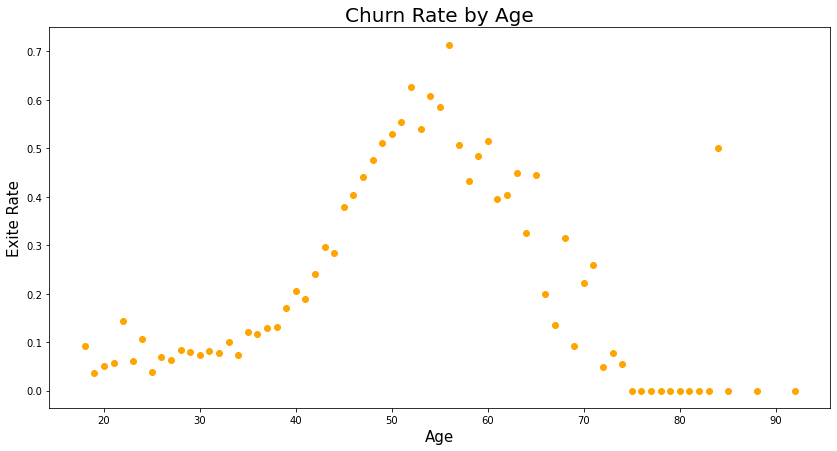

In [42]:
plt.figure(figsize = (14,7))
plt.scatter(x=Age_Exite_rate.index , y= Age_Exite_rate.values,color = 'orange',marker = 'o',)
plt.xlabel('Age',fontsize = 15)
plt.ylabel('Exite Rate',fontsize = 15)
plt.title('Churn Rate by Age',fontsize = 20)
plt.show()

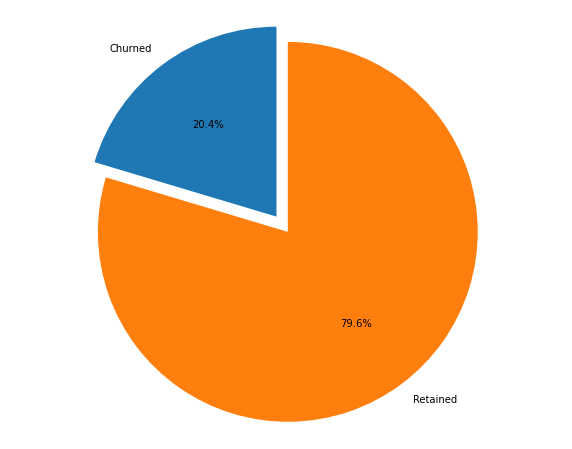

In [47]:
labels = 'Churned', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')
plt.show()